In [3]:
# some_file.py
# %load_ext autoreload
# %autoreload 2
from astropy.io import fits 
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(0, '/Users/hannahfronenberg/Documents/GitHub/pygdsm/pygdsm')
from pygsm2016 import GlobalSkyModel2016
from pygsm import GlobalSkyModel


In [ ]:
gsm = GlobalSkyModel(basemap = 'haslam')
gsm.generate(400)
gsm.view(logged=True)

In [ ]:
gsm_2016 = GlobalSkyModel2016(data_unit = 'TRJ')
gsm_2016.generate(200) # Generate at 150 MHz
plot = gsm_2016.view(logged=True)

In [4]:
nside = 1024 # the Global sky model is in healpix format with Nside = 1024
hp.pixelfunc.ang2pix(1024,[1],[4])


array([2892335])

In [41]:

# ax[0][0].
# ax[0][1].
# ax[0][2].
# ax[1][0].
# ax[1][1].
# ax[1][2].
# ax[2][0].
# ax[2][1].
# ax[2][2].
# divider = make_axes_locatable(ax[0][1])
# cax2 = divider.append_axes("right", size="7%", pad=0.1)
# cbar = fig.colorbar(img1, cax=cax2)
# cbar.set_label('I [kJy/sr]', fontsize = 15)


# fig = plt.figure()

# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)

# ax1.plot([1,2])

# ax1.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off'  # labels along the bottom edge are off)
# )




<Figure size 432x288 with 0 Axes>

<ipython-input-38-6e214b117730>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(2, 2, 1)


ValueError: The Subplot must have been created in the present figure

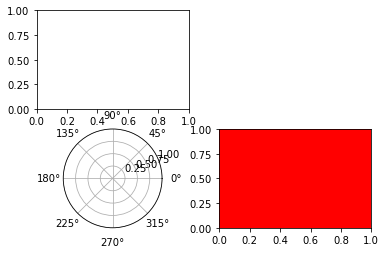

In [38]:
plt.subplot(221)

# equivalent but more general
ax1 = plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2 = plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')



# add ax2 to the figure again
plt.subplot(ax2)

# make the first axes "current" again
plt.subplot(221)

# Generating data file for each freq

In [4]:
freqs = [140] #put all the freqs for which you want to make a sky map here! 

for i in range(len(freqs)): 
    gsm_2016 = GlobalSkyModel2016(data_unit = 'TRJ')
    gsm_2016.generate(freqs[i]) # Generate at i MHz
    data = gsm_2016.generated_map_data
    data = data.astype(np.float32)
    data.tofile('pygdsm_%sMHz.bin'%freqs[i])

# Reading out the data

In [6]:
data_bin = np.fromfile('pygdsm_140MHz.bin', dtype=np.float32) # use complex32 s dtype

print(data_bin)


[154.36157 145.20676 141.73166 ... 175.65773 180.60172 175.3881 ]


# Random

In [7]:
gsm_2016.generated_map_freqs

<Quantity 140. MHz>

In [8]:
print(data)

[154.36157 145.20676 141.73166 ... 175.65773 180.60172 175.3881 ]
